#Gender Income Gap

In [1]:
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#to use the url just pas it to pandas read_excell
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
#split your data by male and female, for example you can load the data into 2 disctionary. 
#other variables may be relevant: for example race.
#the names are not informative, and i am not giving you any meta data to find out what is in each file. 
# 08_2 files are male, 08_3 are female, and I am leaving in the lines of code that read the male files into races

allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

In [3]:
from pandas.tools.plotting import scatter_matrix

In [4]:
allmales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [5]:
#Another way to remove non real entries, is to use the np.isreal command, 
#i end up doing it in a for loop, which is ugly.
#think about how you could improve on that if you already have coding experience
#and are used to pythonic ways!
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

C:\Users\Marco\Anaconda\lib\site-packages\IPython\kernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Marco\Anaconda\lib\site-packages\IPython\kernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
#Scatter Matrix for all males (takes too loong to run)
#scatter_matrix(allmales['all'], s=300, figsize=(6, 6), diagonal='kde')

In [7]:
#Scatter Matrix for all females (takes too loong to run)
#scatter_matrix(allmales['all'], s=300, figsize=(6, 6), diagonal='kde')

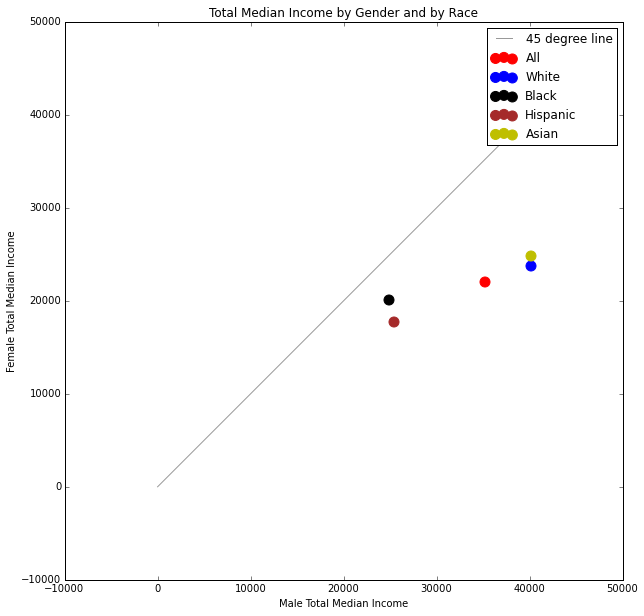

In [8]:
#males median income
mi0= allmales['all']['Median income'][1]
mi1= allmales['white']['Median income'][1]
mi2= allmales['black']['Median income'][1]
mi3= allmales['hispanic']['Median income'][1]
mi4= allmales['asian']['Median income'][1]

#females median income
mi10= allfemales['all']['Median income'][1]
mi5= allfemales['white']['Median income'][1]
mi6= allfemales['black']['Median income'][1]
mi7= allfemales['hispanic']['Median income'][1]
mi8= allfemales['asian']['Median income'][1]

pl.figure(figsize=(10,10))
xlabel('Male Total Median Income')
ylabel('Female Total Median Income')
pl.title("Total Median Income by Gender and by Race")

pl.scatter(mi0,mi10,alpha=1, s=100,color = 'r', label='All')
pl.scatter(mi1,mi5,alpha=1, s=100,color = 'b', label='White')
pl.scatter(mi2,mi6,alpha=1, s=100,color = 'black', label='Black')
pl.scatter(mi3,mi7,alpha=1, s=100,color = 'brown', label='Hispanic')
pl.scatter(mi4,mi8,alpha=1, s=100,color = 'y', label='Asian')
plot([0, 40000], [0, 40000], color = 'black', alpha=.4,label='45 degree line')
pl.plt.legend()



Figure 1. Total Median Income by race for female vs male. The 45° degree line represents perfect equality. Since all points lay down the line, one can conclude that theres unequality on the median income between men and women

In [9]:
X_males=[mi0, mi1, mi2, mi3, mi4]
Y_females=[mi10, mi5, mi6, mi7, mi8]
X = sm.add_constant(X_males)
model = sm.OLS(Y_females, X, missing='drop').fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     22.70
Date:                Sun, 18 Oct 2015   Prob (F-statistic):             0.0176
Time:                        14:08:36   Log-Likelihood:                -40.948
No. Observations:                   5   AIC:                             85.90
Df Residuals:                       3   BIC:                             85.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       9989.8444   2508.397      3.983      0.0

C:\Users\Marco\Anaconda\lib\site-packages\statsmodels\stats\stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


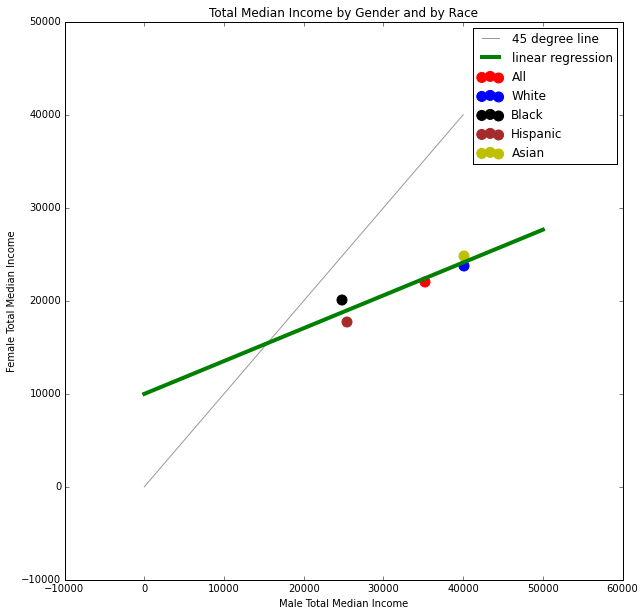

In [10]:
pl.figure(figsize=(10,10))
xlabel('Male Total Median Income')
ylabel('Female Total Median Income')
pl.title("Total Median Income by Gender and by Race")

pl.scatter(mi0,mi10,alpha=1, s=100,color = 'r', label='All')
pl.scatter(mi1,mi5,alpha=1, s=100,color = 'b', label='White')
pl.scatter(mi2,mi6,alpha=1, s=100,color = 'black', label='Black')
pl.scatter(mi3,mi7,alpha=1, s=100,color = 'brown', label='Hispanic')
pl.scatter(mi4,mi8,alpha=1, s=100,color = 'y', label='Asian')
plot([0, 40000], [0, 40000], color = 'black', alpha=.4,label='45 degree line')
x_axis = np.linspace(0, 50000,1000)
plot(x_axis, model.params[0]+model.params[1]*x_axis ,'g',linewidth=4.0, label='linear regression')
pl.plt.legend()

Figure 2. The green line is the regression line for the Total Median Income by race for female vs male. The 45° degree line represents perfect equality. 

In [11]:
cor = stats.spearmanr(X_males, Y_females)
beta1=cor[0]*std(Y_females)/std(X_males)
beta0=mean(Y_females)-beta1*mean(X_males)

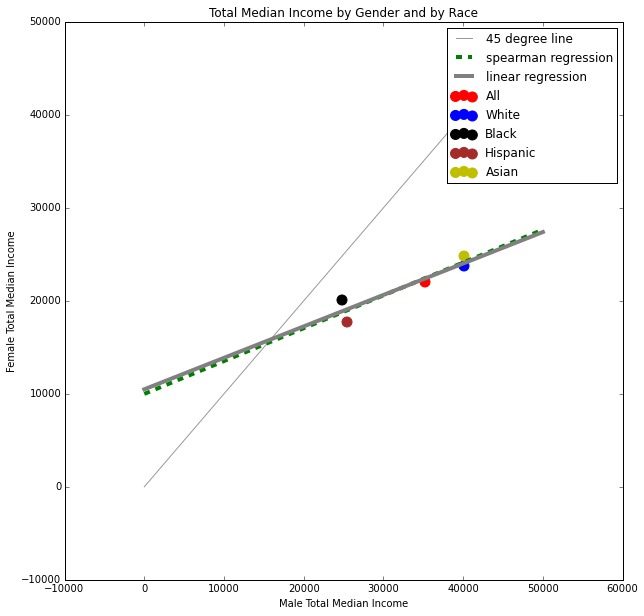

In [19]:
pl.figure(figsize=(10,10))
xlabel('Male Total Median Income')
ylabel('Female Total Median Income')
pl.title("Total Median Income by Gender and by Race")


plot([0, 40000], [0, 40000], color = 'black', alpha=.4,label='45 degree line')
x_axis = np.linspace(0, 50000,1000)
plot(x_axis, model.params[0]+model.params[1]*x_axis ,'g--',linewidth=4.0,label='spearman regression')
plot(x_axis, beta0+beta1*x_axis ,'gray',linewidth=4.0, label= 'linear regression')

pl.scatter(mi0,mi10,alpha=1, s=100,color = 'r', label='All')
pl.scatter(mi1,mi5,alpha=1, s=100,color = 'b', label='White')
pl.scatter(mi2,mi6,alpha=1, s=100,color = 'black', label='Black')
pl.scatter(mi3,mi7,alpha=1, s=100,color = 'brown', label='Hispanic')
pl.scatter(mi4,mi8,alpha=1, s=100,color = 'y', label='Asian')
pl.plt.legend()

Figure 3. the green dashed line represents the spearmans regression for the median income of female vs male on average per race, while the grey line is the linear regressions. Both lines are almost the same. 

In [13]:
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())

#I am gonna create the mask int he next line. 
#the mask is True where either male or female value is Nan. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

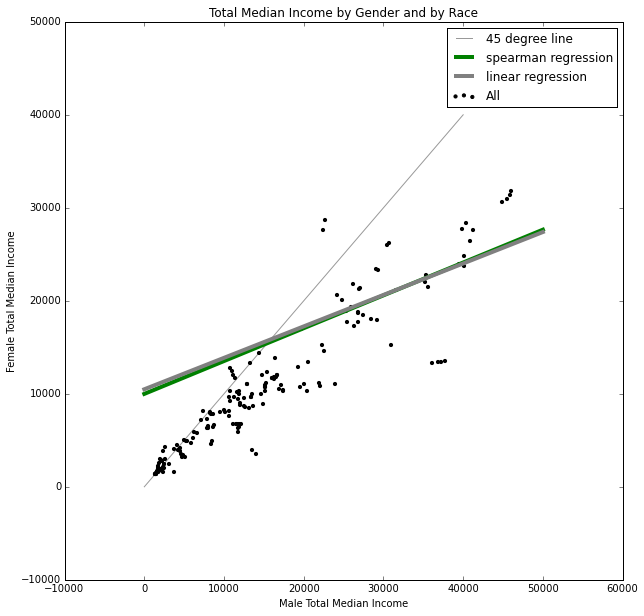

In [14]:
pl.figure(figsize=(10,10))
xlabel('Male Total Median Income')
ylabel('Female Total Median Income')
pl.title("Total Median Income by Gender and by Race")


plot([0, 40000], [0, 40000], color = 'black', alpha=.4,label='45 degree line')
x_axis = np.linspace(0, 50000,1000)
plot(x_axis, model.params[0]+model.params[1]*x_axis ,'g',linewidth=4.0,label='spearman regression')
plot(x_axis, beta0+beta1*x_axis ,'gray',linewidth=4.0, label= 'linear regression')

pl.scatter(all_males,all_females,alpha=1, s=10,color = 'black', label='All')
pl.plt.legend()

Figure 4. The same as Figure 3: Female vs Male total median income, but in this case we added more data points (representing all sources of income)

###Line fit

In [15]:
X_males=all_males
Y_females=all_females
X = sm.add_constant(X_males)
model2 = sm.OLS(Y_females, X, missing='drop').fit()

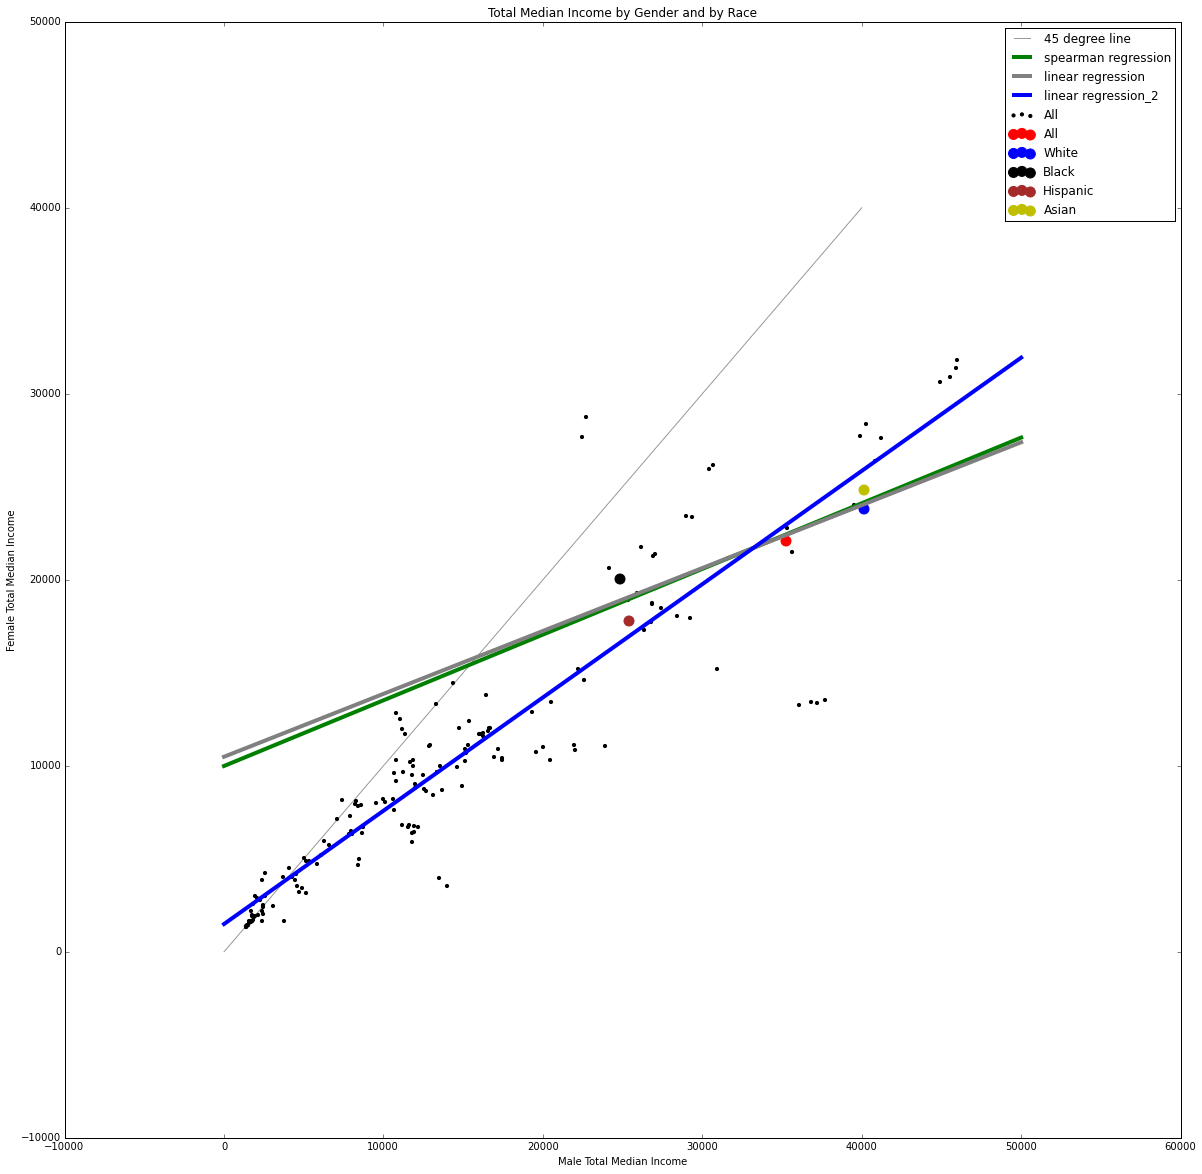

In [16]:
pl.figure(figsize=(20,20))
xlabel('Male Total Median Income')
ylabel('Female Total Median Income')
pl.title("Total Median Income by Gender and by Race")


plot([0, 40000], [0, 40000], color = 'black', alpha=.4,label='45 degree line')
x_axis = np.linspace(0, 50000,1000)
plot(x_axis, model.params[0]+model.params[1]*x_axis ,'g',linewidth=4.0,label='spearman regression')
plot(x_axis, beta0+beta1*x_axis ,'gray',linewidth=4.0, label= 'linear regression')
plot(x_axis, model2.params[0]+model2.params[1]*x_axis ,'blue',linewidth=4.0, label='linear regression_2')
pl.scatter(all_males,all_females,alpha=1, s=10,color = 'black', label='All')
pl.scatter(mi0,mi10,alpha=1, s=100,color = 'r', label='All')
pl.scatter(mi1,mi5,alpha=1, s=100,color = 'b', label='White')
pl.scatter(mi2,mi6,alpha=1, s=100,color = 'black', label='Black')
pl.scatter(mi3,mi7,alpha=1, s=100,color = 'brown', label='Hispanic')
pl.scatter(mi4,mi8,alpha=1, s=100,color = 'y', label='Asian')
pl.plt.legend()

Figure 5. The final regression (blue line) is the line obtained with the OLS regression for all the median income sources for all races. Adding more datapoints improves the estimates. The blue line explains better the data than the prevous regressions.

Remark: Taking into consideration all forms of income, lead to a different fit when comparing to the total median income. 

The unequality of income is more evident taking into account the whole data for median income.

##Now pick a stipend, maybe your ideal stipend?
##and predict what a woman in a position where a man recieves your ideal stipend would make

In [17]:
#I choose an stipend of 50000 USD
s=50000
b0= model2.params[0]
b1= model2.params[1]
print "If a man receives an stipend of %.f USD a woman, on the same position, would recieve, on average, USD "%s ,beta0 + beta1*50000

If a man receives an stipend of 50000 USD a woman, on the same position, would recieve, on average, USD  27394.7954995


##lastly do you have any comments about what these data tell us about race? how you would go about analyzing race differences with these data? (just a few sentences)

I found out that White and Asian groups are sharing similar median income while Black and Hispanic groups receive less income on average. Also, there seems to be less equal income among male and female in Asian and White comparing to Black and Hispanic.

It may be a good idea to perform an Analysis of Variance (Anova) in order to verify the difference between the groups.